In [ ]:
#Import important libraries
from PIL import Image
from keras.preprocessing import image
import os
import numpy as np
import pandas as pd

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

In [ ]:
trainLabels = pd.read_csv("../input/trainLabels.csv")
trainLabels.head()

In [ ]:
listing = os.listdir("../input") 
listing.remove("trainLabels.csv")
np.size(listing)

In [ ]:
# input image dimensions
img_rows, img_cols = 200, 200

immatrix = []
imlabel = []

for file in listing:
    base = os.path.basename("../input/" + file)
    fileName = os.path.splitext(base)[0]
    imlabel.append(trainLabels.loc[trainLabels.image==fileName, 'level'].values[0])
    im = Image.open("../input/" + file)   
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')
    immatrix.append(np.array(gray).flatten())

In [21]:
immatrix = np.asarray(immatrix)
imlabel = np.asarray(imlabel)

In [22]:
from sklearn.utils import shuffle

data,Label = shuffle(immatrix,imlabel, random_state=2)
train_data = [data,Label]
type(train_data)

list

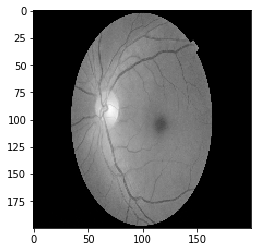

In [23]:
import matplotlib.pyplot as plt
import matplotlib

img=immatrix[167].reshape(img_rows,img_cols)
plt.imshow(img)
plt.imshow(img,cmap='gray')

In [26]:
#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 5
# number of epochs to train
nb_epoch = 5
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3
(X, y) = (train_data[0],train_data[1])

In [28]:
from sklearn.model_selection import train_test_split

# STEP 1: split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print(X_train.shape)
print(X_test.shape)

#X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
#X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

X_train = X_train.reshape(X_train.shape[0], img_cols, img_rows, 1)
X_test = X_test.reshape(X_test.shape[0], img_cols, img_rows, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

(800, 40000)
(200, 40000)
X_train shape: (800, 200, 200, 1)
800 train samples
200 test samples


label :  [1. 0. 0. 0. 0.]


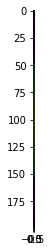

In [29]:
from keras.utils import np_utils

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

i = 100
plt.imshow(X_train[i, 0], interpolation='nearest')
print("label : ", Y_train[i,:])

In [30]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_cols, img_rows, 1)))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta')#KERAS
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

model = Sequential()

model.add(Convolution2D(nb_filters, nb_conv, nb_conv,
                        border_mode='valid',
                        input_shape=(img_cols, img_rows, 1)))
convout1 = Activation('relu')
model.add(convout1)
model.add(Convolution2D(nb_filters, nb_conv, nb_conv))
convout2 = Activation('relu')
model.add(convout2)
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adadelta')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(200, 200,..., padding="valid")`
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  del sys.path[0]
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(200, 200,..., padding="valid")`
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`


In [32]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 198, 198, 32)      320       
_________________________________________________________________
activation_5 (Activation)    (None, 198, 198, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 196, 196, 32)      9248      
_________________________________________________________________
activation_6 (Activation)    (None, 196, 196, 32)      0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 98, 98, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 98, 98, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 307328)            0         
__________

In [34]:
from keras.preprocessing.image import ImageDataGenerator

# create generators  - training data will be augmented images
validationdatagenerator = ImageDataGenerator()
traindatagenerator = ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,rotation_range=15,zoom_range=0.1 )

batchsize=8
train_generator=traindatagenerator.flow(X_train, Y_train, batch_size=batchsize) 
validation_generator=validationdatagenerator.flow(X_test, Y_test,batch_size=batchsize)

In [35]:
model.fit_generator(train_generator, steps_per_epoch=int(len(X_train)/batchsize), epochs=3, validation_data=validation_generator, validation_steps=int(len(X_test)/batchsize))

Epoch 1/3
100/100 [==============================] - 6s 62ms/step - loss: 1.9733 - val_loss: 0.9543
Epoch 2/3
100/100 [==============================] - 4s 38ms/step - loss: 0.9770 - val_loss: 0.9199
Epoch 3/3
100/100 [==============================] - 4s 38ms/step - loss: 0.9462 - val_loss: 1.1738


In [39]:
scores = model.evaluate(X_test, Y_test)
print(scores)

200/200 [==============================] - 0s 466us/step
1.1738282823562622
